In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
import random

import geopandas as gpd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

from ipywidgets import widgets
from ipywidgets import interact, interact_manual


pd.options.display.max_rows = 999
pd.options.display.max_columns = 999


### Data exploration of census data

In [2]:
census=pd.read_csv("./neighbourhoods/neighbourhood-profiles-2016-csv.csv")
census.shape

(2383, 146)

In [3]:
census.columns

Index(['_id', 'Category', 'Topic', 'Data Source', 'Characteristic',
       'City of Toronto', 'Agincourt North', 'Agincourt South-Malvern West',
       'Alderwood', 'Annex',
       ...
       'Willowdale West', 'Willowridge-Martingrove-Richview', 'Woburn',
       'Woodbine Corridor', 'Woodbine-Lumsden', 'Wychwood', 'Yonge-Eglinton',
       'Yonge-St.Clair', 'York University Heights', 'Yorkdale-Glen Park'],
      dtype='object', length=146)

In [4]:
census.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No 

Explore the different categories in each columns !


In [5]:
census['Category'].value_counts()

Language                                   808
Income                                     311
Language of work                           280
Ethnic origin                              279
Education                                  182
Immigration and citizenship                154
Labour                                      76
Housing                                     74
Families, households and marital status     70
Population                                  55
Aboriginal peoples                          34
Journey to work                             25
Mobility                                    18
Visible minority                            15
Neighbourhood Information                    2
Name: Category, dtype: int64

In [6]:
census['Topic'].value_counts()

Ethnic origin population                                                                            279
Language spoken most often at home                                                                  269
Language used most often at work                                                                    269
Knowledge of languages                                                                              263
Mother tongue                                                                                       253
Major field of study - Classification of Instructional Programs (CIP) 2016                          124
Income sources                                                                                       94
Income of individuals in 2015                                                                        80
Recent immigrants by selected place of birth                                                         61
Immigrants by selected place of birth                           

In [8]:
import numpy as np
italian_dict=np.load('./google_api/italian_rest_dict.npy',allo)
type(italian_dict)

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [171]:
names=[]
counts=[]
for key,val in italian_dict.item().items():
    names.append(key)
    counts.append(len(val['results']))
italian_df=pd.DataFrame({'name':names,'count':counts})
italian_df.head()

,name,count
0,Wychwood (94),10
1,Yonge-Eglinton (100),14
2,Yonge-St.Clair (97),9
3,York University Heights (27),9
4,Yorkdale-Glen Park (31),11


In [173]:
italian_df=italian_df.sort_values(by=['name'])
italian_df.head()

,name,count
74,Agincourt North (129),5
75,Agincourt South-Malvern West (128),4
76,Alderwood (20),7
77,Annex (95),20
78,Banbury-Don Mills (42),8


In [175]:
italian_df.index=neighbourhood.index

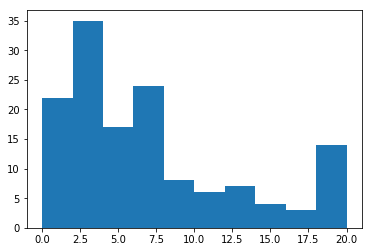

In [176]:
plt.hist(italian_df['count'])
plt.show()

## Manual selection of columns

I went to the stats canada website & found the important chacteristic of the population form the view of a company. These features belong to 7 categories

In [7]:
population_index=[4,7,17,31,18,39,19,40,20,41,21,42,22,43,23,44,24,45,
            25,46,26,47,27,48,28,49,29,50,30,51,32,52,33,53,34,54,35,55]
income_index=[1055,1056,1057,1058,1059,1060,1061,1062,1063,
             1064,1065,1066,1067,1068,1069,1071,1072,1073]
marital_index=[76,80,81,82,83]
household_index=[58,59,61,62,63,64,68,69,70,71,72]
education_index=[1715,1716,1718,1722,1723,1725,1726,1727,1720,1728]
ethnic_index=[1350,1354,1366,1374,1379,1390,1397,1414,1435,1399,1458,1483,
                   1551,1582,1598,1619]
immigrant_index=[1151,1152,1153,1154,1156,1157,1160,1161]

### print the selected categories

In [11]:
census['Characteristic'].loc[population_index+income_index+marital_index+household_index+education_index+ethnic_index+immigrant_index].tolist()

['Population Change 2011-2016',
 'Population density per square kilometre',
 'Male: 10 to 14 years',
 'Female: 10 to 14 years',
 'Male: 15 to 19 years',
 'Female: 15 to 19 years',
 'Male: 20 to 24 years',
 'Female: 20 to 24 years',
 'Male: 25 to 29 years',
 'Female: 25 to 29 years',
 'Male: 30 to 34 years',
 'Female: 30 to 34 years',
 'Male: 35 to 39 years',
 'Female: 35 to 39 years',
 'Male: 40 to 44 years',
 'Female: 40 to 44 years',
 'Male: 45 to 49 years',
 'Female: 45 to 49 years',
 'Male: 50 to 54 years',
 'Female: 50 to 54 years',
 'Male: 55 to 59 years',
 'Female: 55 to 59 years',
 'Male: 60 to 64 years',
 'Female: 60 to 64 years',
 'Male: 65 to 69 years',
 'Female: 65 to 69 years',
 'Male: 70 to 74 years',
 'Female: 70 to 74 years',
 'Male: 75 to 79 years',
 'Female: 75 to 79 years',
 'Male: 80 to 84 years',
 'Female: 80 to 84 years',
 'Male: 85 to 89 years',
 'Female: 85 to 89 years',
 'Male: 90 to 94 years',
 'Female: 90 to 94 years',
 'Male: 95 to 99 years',
 'Female: 95 to

In [12]:
census_sel=census.loc[population_index+education_index+marital_index+household_index+income_index+
          immigrant_index+ethnic_index].iloc[:,4:]
census_sel.index=census_sel['Characteristic']
census_sel.drop(labels=['Characteristic','City of Toronto'],axis=1,inplace=True)
census_sel.head()

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Characteristic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Population Change 2011-2016,-3.90%,8.00%,1.30%,4.60%,2.90%,2.80%,33.30%,21.10%,-2.80%,0.20%,1.40%,7.50%,2.00%,-1.50%,-0.50%,-0.30%,6.30%,-0.60%,-0.20%,-3.20%,1.10%,4.60%,2.10%,10.60%,8.90%,12.70%,1.50%,2.80%,2.40%,2.80%,1.20%,2.60%,5.80%,1.10%,2.90%,2.60%,4.00%,-0.20%,-1.00%,1.30%,-1.20%,8.40%,-1.10%,2.70%,-1.80%,-2.90%,2.40%,1.00%,38.70%,4.10%,10.10%,-4.60%,-4.10%,3.40%,-0.90%,-1.90%,1.80%,4.20%,15.40%,2.40%,3.90%,0.40%,-3.00%,1.30%,1.10%,0.80%,-2.10%,10.40%,0.50%,0.70%,-1.10%,29.10%,4.70%,-2.90%,-0.80%,1.10%,-2.20%,28.00%,-0.80%,25.80%,3.40%,0.50%,5.00%,3.70%,5.20%,-2.00%,3.40%,46.60%,-2.30%,4.40%,2.60%,0.70%,2.00%,1.30%,0.60%,0.50%,23.10%,2.00%,-2.00%,-1.30%,8.00%,0.40%,-0.10%,-0.50%,1.40%,1.30%,4.50%,-0.10%,0.70%,2.80%,8.70%,-0.80%,-1.60%,1.50%,0.20%,0.60%,2.10%,2.20%,9.80%,-1.50%,-2.20%,1.90%,52.00%,3.20%,-2.30%,3.30%,-1.00%,-7.60%,3.30%,12.00%,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
Population density per square kilometre,"3,929","3,034","2,435","10,863","2,775","3,377","14,097","4,195","3,240","4,209","3,614","4,011","3,765","6,282","8,134","7,791","1,040","6,764","5,045","8,335","6,464","5,683","2,479","23,044","3,632","3,979","2,273","7,478","8,554","7,881","6,441","4,146","9,819","2,337","8,540","8,038","2,840","7,051","3,306","6,466","2,171","6,582","9,026","8,054","4,380","5,864","8,582","2,673","6,047","11,726","4,893","

In [13]:
census_sel.shape

(106, 140)

Invert the dataframe to make neighbourhoods samples

In [14]:
neighbourhood_sel=census_sel.T.copy()
neighbourhood_sel.head()

Characteristic,Population Change 2011-2016,Population density per square kilometre,Male: 10 to 14 years,Female: 10 to 14 years,Male: 15 to 19 years,Female: 15 to 19 years,Male: 20 to 24 years,Female: 20 to 24 years,Male: 25 to 29 years,Female: 25 to 29 years,Male: 30 to 34 years,Female: 30 to 34 years,Male: 35 to 39 years,Female: 35 to 39 years,Male: 40 to 44 years,Female: 40 to 44 years,Male: 45 to 49 years,Female: 45 to 49 years,Male: 50 to 54 years,Female: 50 to 54 years,Male: 55 to 59 years,Female: 55 to 59 years,Male: 60 to 64 years,Female: 60 to 64 years,Male: 65 to 69 years,Female: 65 to 69 years,Male: 70 to 74 years,Female: 70 to 74 years,Male: 75 to 79 years,Female: 75 to 79 years,Male: 80 to 84 years,Female: 80 to 84 years,Male: 85 to 89 years,Female: 85 to 89 years,Male: 90 to 94 years,Female: 90 to 94 years,Male: 95 to 99 years,Female: 95 to 99 years,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Apprenticeship or trades certificate or diploma,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Bachelor's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry",Master's degree,Earned doctorate,Married or living common law,Never married,Separated,Divorced,Widowed,Single-detached house,Apartment in a building that has five or more storeys,Semi-detached house,Row house,Apartment or flat in a duplex,Apartment in a building that has fewer than five storeys,1 person,2 persons,3 persons,4 persons,5 or more persons,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999",Non-immigrants,Immigrants,Before 1981,1981 to 1990,1991 to 2000,2001 to 2010,2011 to 2016,Non-permanent residents,North American Aboriginal origins,Other North American origins,British Isles origins,French origins,Western European origins (except French origins),Northern European origins (except British Isles origins),Eastern European origins,Southern European origins,Jewish,Caribbean origins,Latin; Central and South American origins,African origins,West Central Asian and Middle Eastern origins,South Asian origins,East and Southeast Asian origins,Oceania origins
Agincourt North,-3.90%,"3,929",660,595,840,865,1015,975,1015,1005,835,935,680,775,760,910,890,1060,1160,1290,1060,1165,925,1070,925,985,590,690,490,575,380,485,210,350,100,160,25,60,3335,4240,520,2550,570,3090,215,105,735,85,14200,7355,570,1460,1690,3345,2120,805,1440,645,735,1350,2370,1995,1750,1645,150,105,165,450,340,565,450,510,455,475,930,755,695,640,500,935,465,510,"7,895","19,995","3,450","3,250","5,595","5,535","2,165",930,40,"1,345","1,500",265,350,80,265,"1,215",0,"1,445",470,535,475,"5,260","18,575",10
Agincourt South-Malvern West,8.00%,"3,034",460,475,780,690,1000,895,1045,975,820,835,625,715,610,745,760,885,970,975,850,915,710,795,630,690,425,450,350,405,240,350,155,205,45,100,20,20,1860,3410,460,2340,485,3270,215,120,920,85,11205,6605,460,1325,1080,2790,3145,330,515,695,610,1610,2325,1680,1335,1175,320,130,205,275,350,415,395,450,470,445,860,755,630,500,405,700,370,425,"7,190","15,095","2,830","2,255","3,805","4,460","1,735","1,175",105,"1,190","1,750",260,425,95,430,"1,635",20,"1,395",480,625,805,"4,170","13,075",0
Alderwood,1.30%,"2,435",225,255,285,290,355,310,355,350,410,430,455,450,420,445,440,430,515,515,540,485,390,400,300,325,205,210,155,180,105,210,65,130,35,70,10,5,795,1825,445,1735,195,1415,105,45,390,25,5735,3005,270,595,685,2840,255,545,85,330,560,1105,1440,885,795,390,70,35,80,85,160,175,170,210,185,225,390,355,365,310,265,605,445,470,"7,975","3,970","1,715",605,770,685,200,8

## Format the data to float

In [15]:
for col in neighbourhood_sel.columns:
    print(col)
    neighbourhood_sel[col] = neighbourhood_sel[col].str.replace('%', '')
    neighbourhood_sel[col] = neighbourhood_sel[col].str.replace(',', '')
    neighbourhood_sel[col] = neighbourhood_sel[col].astype(float)

Population Change 2011-2016
Population density per square kilometre
Male: 10 to 14 years
Female: 10 to 14 years
Male: 15 to 19 years
Female: 15 to 19 years
Male: 20 to 24 years
Female: 20 to 24 years
Male: 25 to 29 years
Female: 25 to 29 years
Male: 30 to 34 years
Female: 30 to 34 years
Male: 35 to 39 years
Female: 35 to 39 years
Male: 40 to 44 years
Female: 40 to 44 years
Male: 45 to 49 years
Female: 45 to 49 years
Male: 50 to 54 years
Female: 50 to 54 years
Male: 55 to 59 years
Female: 55 to 59 years
Male: 60 to 64 years
Female: 60 to 64 years
Male: 65 to 69 years
Female: 65 to 69 years
Male: 70 to 74 years
Female: 70 to 74 years
Male: 75 to 79 years
Female: 75 to 79 years
Male: 80 to 84 years
Female: 80 to 84 years
Male: 85 to 89 years
Female: 85 to 89 years
Male: 90 to 94 years
Female: 90 to 94 years
Male: 95 to 99 years
Female: 95 to 99 years
  No certificate, diploma or degree
  Secondary (high) school diploma or equivalency certificate
    Apprenticeship or trades certificate or

## Cluster using all the columns

## PCA

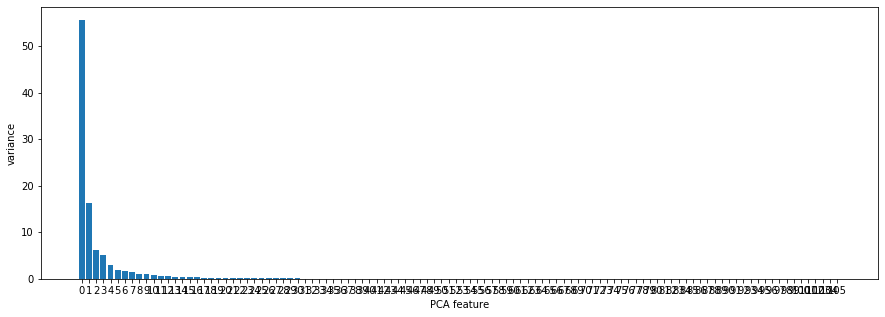

In [18]:
# Create scaler: scaler
scaler = StandardScaler()
# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(neighbourhood_sel)
pca_components=pipeline.transform(neighbourhood_sel)

# Plot the explained variances
features = range(pca_components.shape[1])
explained_var=pca.explained_variance_/sum(pca.explained_variance_)*100
plt.figure(figsize=(15,5))
plt.bar(features,explained_var)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


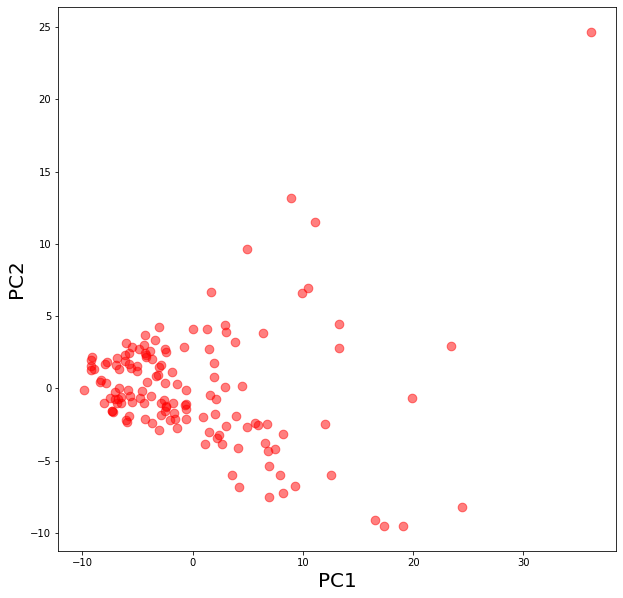

In [28]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(pca_components[:,0],pca_components[:,1],s=75,color='red',alpha=.5)
ax.set_xlabel('PC1',fontsize=20)
ax.set_ylabel('PC2',fontsize=20)
plt.show()

## Elbow method

2 8542.950357441958
3 6892.288754850266
4 5757.134444083951
5 4877.888077685694
6 4378.6137611057375
7 4061.5519980582226
8 3786.2707951009934
9 3548.7489507588725
10 3302.9182851116993
11 3062.736690543771
12 2907.623806805621
13 2717.859837369523
14 2638.04067882349
15 2458.2423439480535
16 2341.6164356392437
17 2235.2423957640003
18 2157.9123715237592
19 2080.236946727579


Text(0.5, 1.0, 'Elbow curve')

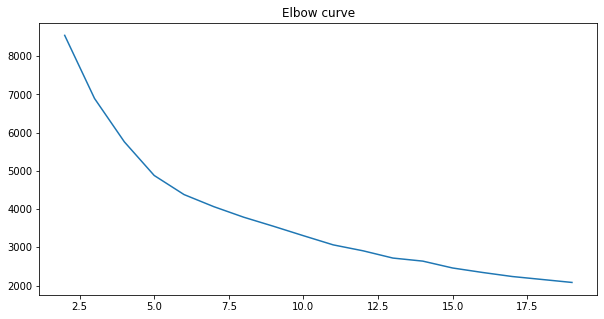

In [35]:
X = pca_components[:,0:10]
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    print(k,kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distorsions)
plt.title('Elbow curve')

In [36]:
kmeans = KMeans(n_clusters=7, init='random',n_init=100).fit(pca_components[:,0:10])
pd.Series(kmeans.labels_).value_counts()

3    49
6    33
2    21
1    20
4     8
0     8
5     1
dtype: int64

In [37]:
kmeans = KMeans(n_clusters=8, init='random',n_init=100).fit(pca_components[:,0:10])
pd.Series(kmeans.labels_).value_counts()

4    42
6    30
3    26
5    21
1     8
2     7
0     5
7     1
dtype: int64

15.743139561771073
33.46988486599537


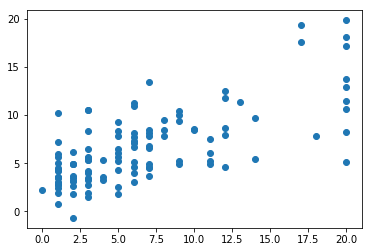

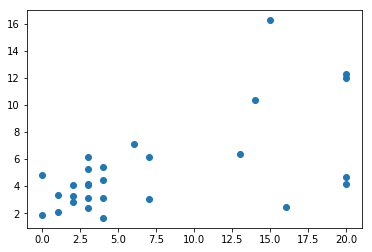

In [673]:
data=neighbourhood_sel.copy()
y=italian_df['count']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20,random_state=40)

estimator = LinearRegression(fit_intercept=False,normalize=False)
selector = RFE(estimator, 10, step=1)
selector = selector.fit(X_train, y_train)
best_cols=X_train.columns[selector.support_].tolist()




lr_model=LinearRegression(fit_intercept=False,normalize=False)
lr_model.fit(X_train[best_cols],y_train)
y_train_pred=lr_model.predict(X_train[best_cols])
print(mean_squared_error(y_train,y_train_pred))
y_test_pred=lr_model.predict(X_test[best_cols])
print(mean_squared_error(y_test,y_test_pred))

plt.scatter(y_train,y_train_pred)
plt.show()
plt.scatter(y_test,y_test_pred)
plt.show()

In [683]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)


data=neighbourhood_sel.copy()
y=italian_df['count']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20,random_state=40)

X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly=polynomial_features.transform(X_test)





estimator = LinearRegression()
selector = RFE(estimator, 10, step=10)
selector = selector.fit(X_train_poly, y_train)
best_cols=X_train_poly.columns[selector.support_].tolist()





lr_model=LinearRegression()
lr_model.fit(X_train_poly[best_cols],y_train)
y_train_pred=lr_model.predict(X_train_poly[best_cols])
print(mean_squared_error(y_train,y_train_pred))
y_test_pred=lr_model.predict(X_test_poly[best_cols])
print(mean_squared_error(y_test,y_test_pred))

plt.scatter(y_train,y_train_pred)
plt.show()
plt.scatter(y_test,y_test_pred)
plt.show()



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### Find the highly correlated

In [468]:
col_sel=[]
for col in neighbourhood_sel.columns:
    cor=neighbourhood_sel[col].corr(italian_df['count'],method='spearman')
    if abs(cor)>.5:
        col_sel.append(col)
        print(col,cor)

NameError: name 'italian_df' is not defined

Text(0.5, 1.0, 'Elbow curve')

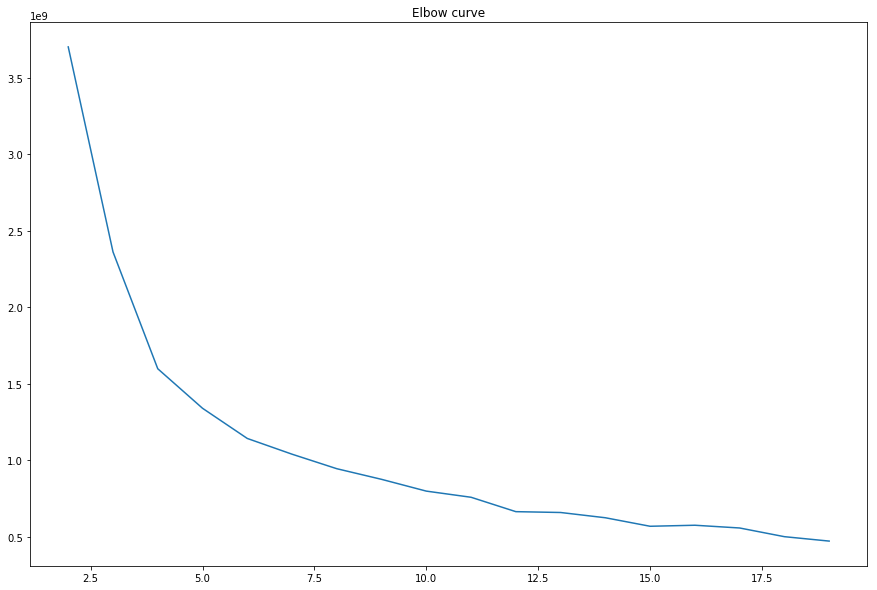

In [689]:
# kmeans = KMeans(n_clusters=5, init='random',n_init=100).fit(pca_components[:,0:10])
# pd.Series(kmeans.labels_).value_counts()

X = pca_components[:,0:10]
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='random',n_init=100)
    kmeans.fit(neighbourhood_sel[col_sel])
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 10))
plt.plot(range(2, 20), distorsions)
plt.title('Elbow curve')



In [690]:
kmeans = KMeans(n_clusters=6, init='random',n_init=100).fit(neighbourhood_sel[col_sel])
pd.Series(kmeans.labels_).value_counts()


2    48
3    39
5    31
1    14
0     7
4     1
dtype: int64

In [691]:
test_df=pd.DataFrame({'name':neighbourhood_sel.index,'label':kmeans.labels_,'count':italian_df['count']})

In [694]:
test_df.groupby(by=['label'])['count'].mean()

label
0    16.571429
1    10.857143
2     5.291667
3     3.410256
4    20.000000
5     8.806452
Name: count, dtype: float64

In [695]:
test_df['name'][test_df['label']==1]

Bedford Park-Nortown                                  Bedford Park-Nortown
Birchcliffe-Cliffside                                Birchcliffe-Cliffside
Dovercourt-Wallace Emerson-Junction    Dovercourt-Wallace Emerson-Junction
East End-Danforth                                        East End-Danforth
High Park North                                            High Park North
High Park-Swansea                                        High Park-Swansea
Leaside-Bennington                                      Leaside-Bennington
Parkwoods-Donalda                                        Parkwoods-Donalda
Rosedale-Moore Park                                    Rosedale-Moore Park
Rouge                                                                Rouge
South Riverdale                                            South Riverdale
Stonegate-Queensway                                    Stonegate-Queensway
The Beaches                                                    The Beaches
Woburn                   

/Users/Vineeth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in log10



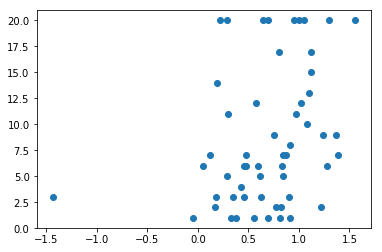

In [676]:
plt.scatter(np.log10(pca_components[:,0]),italian_df['count'])

## Read the map data

In [73]:
df_toronto=gpd.read_file("./Neighbourhoods.geojson")
df_toronto.shape

(140, 16)

In [74]:
df_toronto=df_toronto.sort_values(by=['AREA_NAME'])
df_toronto.head(2)

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
74,1195,25886428,25926736,49885,129,129,Agincourt North (129),Agincourt North (129),None,None,-79.266712,43.805441,16492689,1.395145e+07,17159.740667,"POLYGON ((-79.24212745783549 43.8024720055488,..."
75,1196,25886449,25926737,49885,128,128,Agincourt South-Malvern West (128),Agincourt South-Malvern West (128),None,None,-79.265612,43.788658,16492705,1.511736e+07,21320.849547,POLYGON ((-79.25497985384374 43.78122253713403...


In [103]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
color_list=list(colors.keys())

In [294]:
color_sel=['red','yellow','firebrick','orange','blue','olive','deepskyblue','yellowgreen','cyan','magenta','chocolate']

# Select the subset of columns

In [59]:
w=widgets.SelectMultiple(
    options=neighbourhood_sel.columns.tolist(),
    rows=25,
    description='Features',
    disabled=False
)
w

SelectMultiple(description='Features', options=('Population Change 2011-2016', 'Population density per square …

In [272]:
selected_cols=list(w.value)
selected_cols

['      Degree in medicine, dentistry, veterinary medicine or optometry',
 "      Master's degree",
 '  Single-detached house',
 '  $50,000 to $59,999',
 '  $60,000 to $69,999',
 '  $70,000 to $79,999',
 '    2011 to 2016',
 ' Eastern European origins']

In [273]:
subset=neighbourhood_sel[selected_cols]

Text(0.5, 1.0, 'Elbow curve')

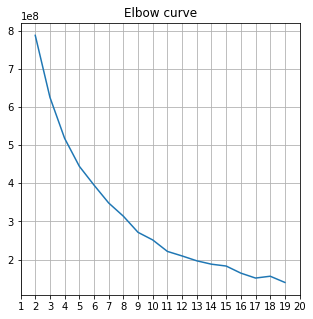

In [274]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='random',n_init=100)
    kmeans.fit(subset)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(5, 5))
plt.plot(range(2, 20), distorsions)
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.title('Elbow curve')

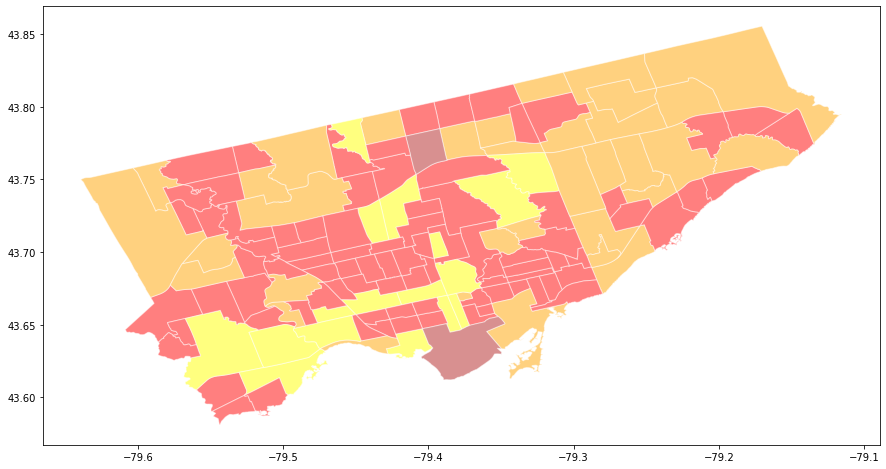

In [339]:
n_clust=4
scalar=StandardScaler()
X=scalar.fit_transform(subset)
kmeans = KMeans(n_clusters=n_clust, init='random',n_init=100).fit(X)
cluster_labels=pd.DataFrame({'name':subset.index,'label':kmeans.labels_})
#rand_colors = random.sample(color_list,n_clust)
rand_colors=color_sel[0:n_clust]
cluster_labels['color']=cluster_labels['label'].map(dict(zip(range(n_clust), rand_colors)))
df_toronto.plot(figsize=(15,15),edgecolor='white',alpha=0.5,color=cluster_labels['color'],legend=True)
plt.show()


In [340]:
cluster_labels['color'].value_counts()

red          87
orange       34
yellow       17
firebrick     2
Name: color, dtype: int64

In [341]:
subset_label=subset.copy()
subset_label['label']=cluster_labels['color'].values
cluster_df=subset_label.groupby('label').median()
cluster_df

Characteristic,"Degree in medicine, dentistry, veterinary medicine or optometry",Master's degree,Single-detached house,"$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999",2011 to 2016,Eastern European origins
label,,,,,,,,
firebrick,867.5,7435.0,1820.0,2837.5,2805.0,2445.0,6067.5,6187.5
orange,105.0,987.5,2792.5,885.0,757.5,687.5,2177.5,1342.5
red,55.0,800.0,1575.0,470.0,400.0,345.0,530.0,1580.0
yellow,255.0,2410.0,1905.0,1160.0,1060.0,820.0,1500.0,5415.0


In [342]:
rand_colors


['red', 'yellow', 'firebrick', 'orange']

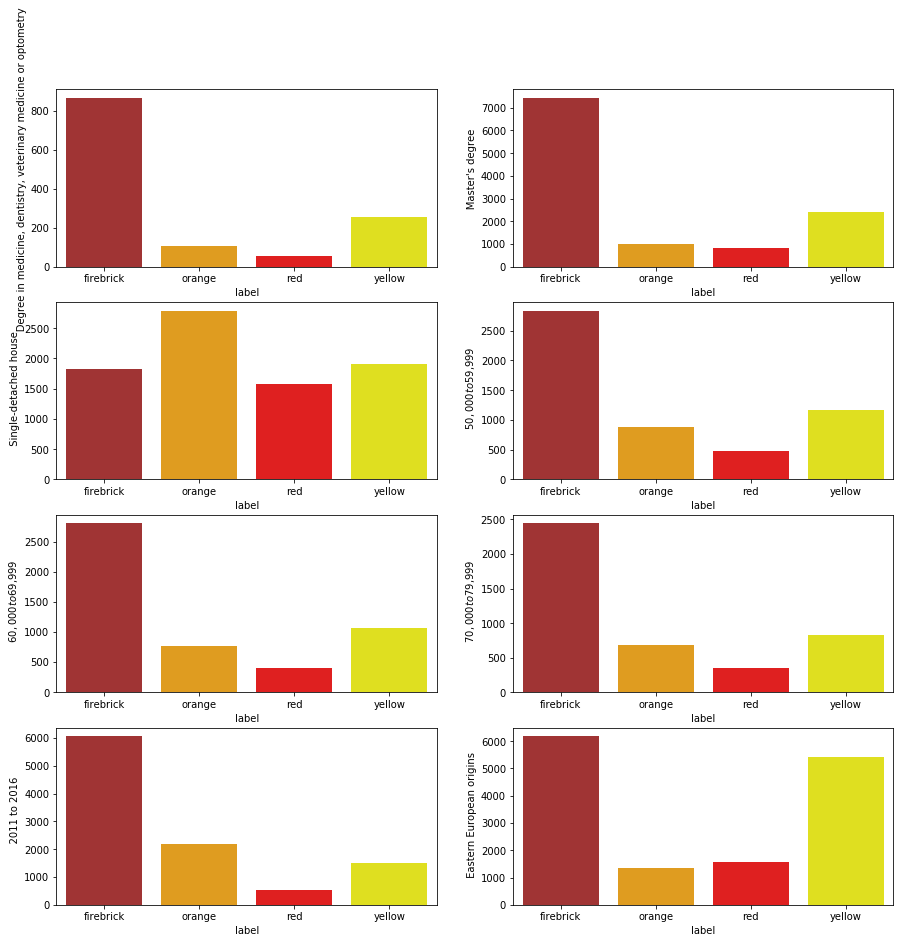

In [343]:
n_plots=len(cluster_df.columns)
rows=int((n_plots+(n_plots%2))/2)
fig,ax=plt.subplots(rows,2,figsize=(15,15))
i=0

for m in range(len(cluster_df.columns)):
    j=int(m%2)
    i=int(m/2)
    sns.barplot(y=cluster_df.iloc[:,m],x=cluster_df.index,palette=cluster_df.index,ax=ax[i,j])


plt.show()

In [125]:
df_toronto.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
74,1195,25886428,25926736,49885,129,129,Agincourt North (129),Agincourt North (129),None,None,-79.266712,43.805441,16492689,1.395145e+07,17159.740667,"POLYGON ((-79.24212745783549 43.8024720055488,..."
75,1196,25886449,25926737,49885,128,128,Agincourt South-Malvern West (128),Agincourt South-Malvern West (128),None,None,-79.265612,43.788658,16492705,1.511736e+07,21320.849547,POLYGON ((-79.25497985384374 43.78122253713403...
76,1197,25886794,25926738,49885,20,20,Alderwood (20),Alderwood (20),None,None,-79.541611,43.604937,16492721,9.502180e+06,12667.013917,POLYGON ((-79.54865745246562 43.59021610127974...
77,1198,25886874,25926739,49885,95,95,Annex (95),Annex (95),None,None,-79.404001,43.671585,16492737,5.337192e+06,10513.883143,"POLYGON ((-79.39414141343556 43.6687202679382,..."
78,1199,25886643,25926740,49885,42,42,Banbury-Don Mills (42),Banbury-Don Mills (42),None,None,-79.349718,43.737657,16492753,1.924897e+07,25141.572290,POLYGON ((-79.33055472634429 43.73978987881326...


# Clusters from a keyword & demography selection

### Overlay points on the map

In [166]:
chinese_rest=np.load('./google_api/chinese_rest_dict.npy',allow_pickle=True).item()
names=[]
counts=[]
for key,val in chinese_rest.items():
    names.append(key)
    counts.append(len(val['results']))
chinese_df=pd.DataFrame({'name':names,'count':counts})
chinese_df=chinese_df.sort_values(by=['name'])
chinese_df.head()

,name,count
74,Agincourt North (129),20
75,Agincourt South-Malvern West (128),20
76,Alderwood (20),5
77,Annex (95),13
78,Banbury-Don Mills (42),9


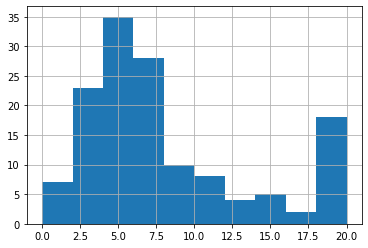

In [167]:
chinese_df['count'].hist()

In [173]:
from shapely.geometry import Point,Polygon

In [175]:
geometry=[Point(xy) for xy in zip(df_toronto['LONGITUDE'],df_toronto['LATITUDE'])]

In [176]:
geo_chinese=gpd.GeoDataFrame(chinese_df,geometry=geometry)

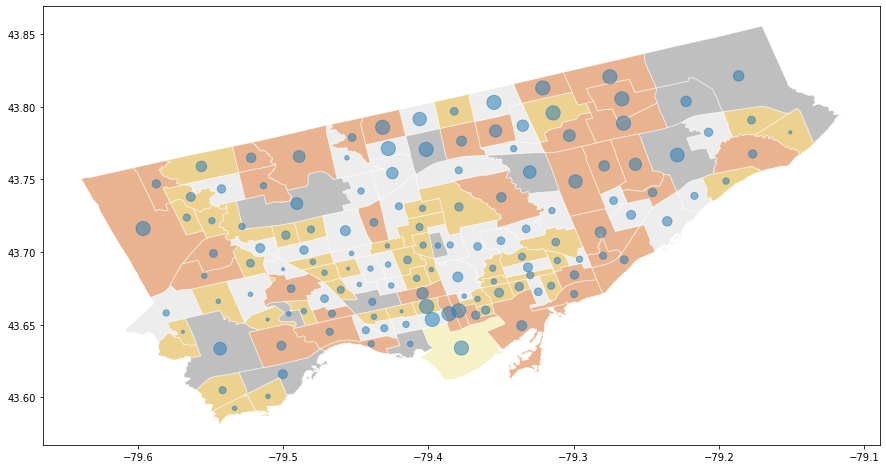

In [186]:
fig,ax=plt.subplots(figsize=(15,15))
df_toronto.plot(ax=ax,edgecolor='white',alpha=0.5,color=cluster_labels['color'],legend=True)
geo_chinese.plot(ax=ax,markersize=geo_chinese['count']*10,alpha=.5)
plt.show()

In [189]:
chinese_df['color']=cluster_labels['color']
chinese_df.head(2)

,name,count,geometry,color
74,Agincourt North (129),20,POINT (-79.266712166 43.8054405769),goldenrod
75,Agincourt South-Malvern West (128),20,POINT (-79.2656117966 43.78865755109999),goldenrod


,count
color,
chocolate,"AxesSubplot(0.125,0.125;0.775x0.755)"
gainsboro,"AxesSubplot(0.125,0.125;0.775x0.755)"
goldenrod,"AxesSubplot(0.125,0.125;0.775x0.755)"
gray,"AxesSubplot(0.125,0.125;0.775x0.755)"
khaki,"AxesSubplot(0.125,0.125;0.775x0.755)"


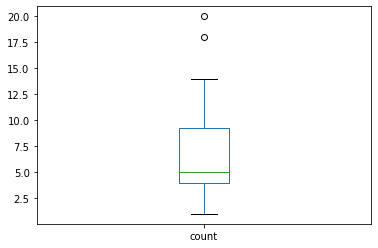

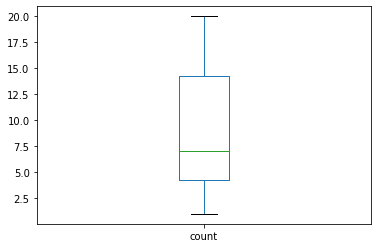

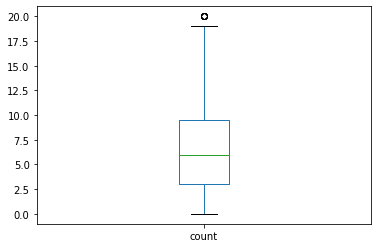

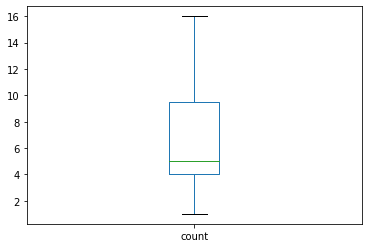

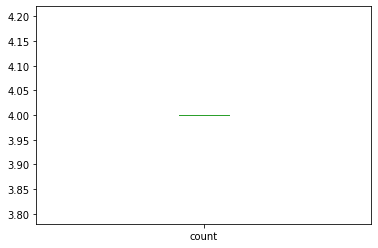

In [196]:
chinese_df.groupby('color').plot(kind='box',subplots=True)

## Keyword search only

In [209]:
caribbean_rest=np.load('./google_api/caribbean_rest_dict.npy',allow_pickle=True).item()
names=[]
counts=[]
for key,val in caribbean_rest.items():
    names.append(key)
    counts.append(len(val['results']))
caribbean_df=pd.DataFrame({'name':names,'count':counts})
caribbean_df=caribbean_df.sort_values(by=['name'])
caribbean_df.index=neighbourhood_sel.index
caribbean_df.head(2)

,name,count
Agincourt North,Agincourt North (129),10
Agincourt South-Malvern West,Agincourt South-Malvern West (128),11


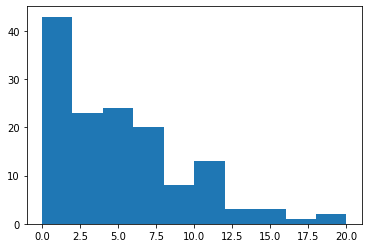

In [210]:
plt.hist(caribbean_df['count'])
plt.show()

In [215]:
cols_correlated=[]
for col in neighbourhood_sel.columns:
    corr=neighbourhood_sel[col].corr(caribbean_df['count'])
    if abs(corr)>.5:
        print(col,corr)
        cols_correlated.append(col)

Male: 20 to 24 years 0.546969449020998
  No certificate, diploma or degree 0.5651632369178624
  Secondary (high) school diploma or equivalency certificate 0.5738931736271579
    Apprenticeship or trades certificate or diploma 0.5752701286579252
    Apartment or flat in a duplex 0.5442606066813038
 Caribbean origins 0.635818450470185
 Latin; Central and South American origins 0.5455656797434846
 South Asian origins 0.543420037566063


In [216]:
cols_correlated

['Male: 20 to 24 years',
 '  No certificate, diploma or degree',
 '  Secondary (high) school diploma or equivalency certificate',
 '    Apprenticeship or trades certificate or diploma',
 '    Apartment or flat in a duplex',
 ' Caribbean origins',
 ' Latin; Central and South American origins',
 ' South Asian origins']

Text(0.5, 1.0, 'Elbow curve')

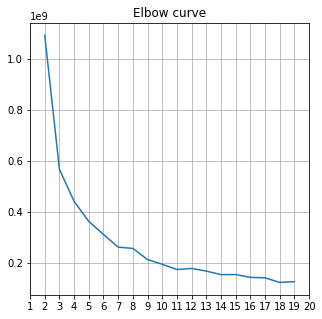

In [227]:
subset=neighbourhood_sel[cols_correlated]
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='random',n_init=100)
    kmeans.fit(subset)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(5, 5))
plt.plot(range(2, 20), distorsions)
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.title('Elbow curve')

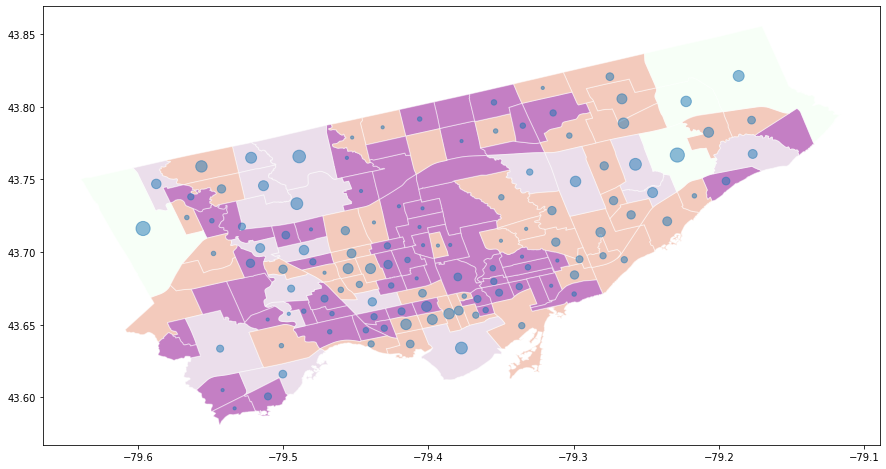

In [225]:
n_clust=4
scalar=StandardScaler()
X=scalar.fit_transform(subset)
kmeans = KMeans(n_clusters=n_clust, init='random',n_init=100).fit(X)
cluster_labels=pd.DataFrame({'name':subset.index,'label':kmeans.labels_})
rand_colors = random.sample(color_list,n_clust)
cluster_labels['color']=cluster_labels['label'].map(dict(zip(range(n_clust), rand_colors)))
geo_carribean=gpd.GeoDataFrame(caribbean_df,geometry=geometry)
fig,ax=plt.subplots(figsize=(15,15))
df_toronto.plot(ax=ax,edgecolor='white',alpha=0.5,color=cluster_labels['color'],legend=True)
geo_carribean.plot(ax=ax,markersize=geo_carribean['count']*10,alpha=.5)
plt.show()

In [226]:
subset_label=subset.copy()
subset_label['label']=cluster_labels['color'].values
subset_label.groupby('label').median()

Characteristic,Male: 20 to 24 years,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Apprenticeship or trades certificate or diploma,Apartment or flat in a duplex,Caribbean origins,Latin; Central and South American origins,South Asian origins
label,,,,,,,,
darkmagenta,385.0,420.0,1280.0,260.0,190.0,460.0,395.0,575.0
darksalmon,700.0,1200.0,2385.0,475.0,315.0,960.0,670.0,2455.0
honeydew,1797.5,3250.0,6797.5,1095.0,1485.0,5472.5,1930.0,19175.0
thistle,1142.5,2197.5,4132.5,902.5,387.5,2792.5,1785.0,3640.0


## Clustering after PCA

Text(0.5, 1.0, 'Elbow curve')

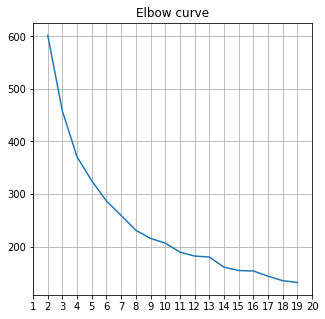

In [229]:
# Create scaler: scaler
scaler = StandardScaler()
# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)
subset=neighbourhood_sel[cols_correlated]
# Fit the pipeline to 'samples'
pipeline.fit(subset)
pca_components=pipeline.transform(subset)


distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='random',n_init=100)
    kmeans.fit(pca_components)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(5, 5))
plt.plot(range(2, 20), distorsions)
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.title('Elbow curve')


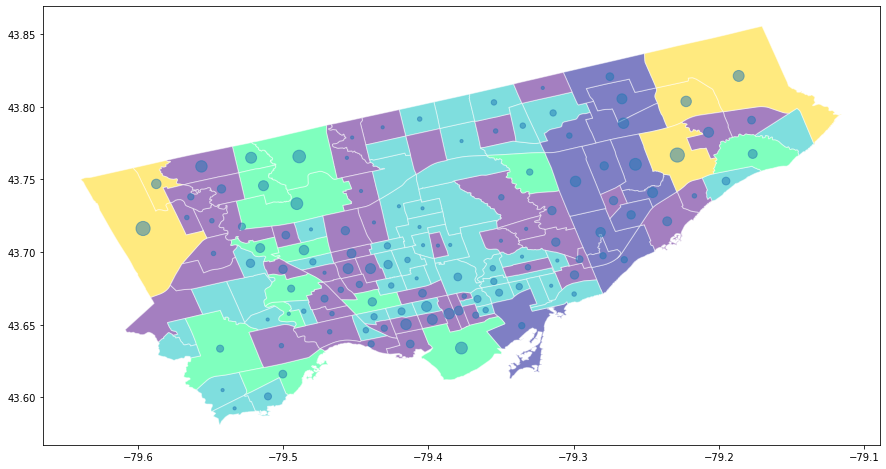

In [268]:
n_clust=5
X=pca_components[:,0:4]
kmeans = KMeans(n_clusters=n_clust, init='random',n_init=100).fit(X)
cluster_labels=pd.DataFrame({'name':subset.index,'label':kmeans.labels_})
rand_colors = random.sample(color_list,n_clust)
cluster_labels['color']=cluster_labels['label'].map(dict(zip(range(n_clust), rand_colors)))
geo_carribean=gpd.GeoDataFrame(caribbean_df,geometry=geometry)
fig,ax=plt.subplots(figsize=(15,15))
df_toronto.plot(ax=ax,edgecolor='white',alpha=0.5,color=cluster_labels['color'],legend=True)
geo_carribean.plot(ax=ax,markersize=geo_carribean['count']*10,alpha=.5)
plt.show()

In [269]:
pd.Series(kmeans.labels_).value_counts()

3    54
2    54
4    14
1    13
0     5
dtype: int64

In [265]:
pd.Series(kmeans.labels_).value_counts()

3    62
0    56
2    18
1     4
dtype: int64

In [270]:
subset_label=subset.copy()
subset_label['label']=cluster_labels['color'].values
subset_label.groupby('label').median()

Characteristic,Male: 20 to 24 years,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Apprenticeship or trades certificate or diploma,Apartment or flat in a duplex,Caribbean origins,Latin; Central and South American origins,South Asian origins
label,,,,,,,,
c,375.0,382.5,1215.0,227.5,180.0,435.0,365.0,555.0
darkblue,920.0,1825.0,3410.0,585.0,685.0,1545.0,670.0,4360.0
gold,1770.0,3490.0,6770.0,1040.0,1220.0,4665.0,1745.0,18085.0
indigo,577.5,1000.0,2145.0,427.5,270.0,895.0,720.0,1510.0
springgreen,1142.5,2235.0,4132.5,915.0,305.0,2877.5,2040.0,2495.0


# Partial least squares

In [232]:
from sklearn.cross_decomposition import PLSRegression

In [242]:
pls2 = PLSRegression(n_components=5)
pls_components=pls2.fit_transform(neighbourhood_sel, chinese_df['count'])
Y_pred = pls2.predict(neighbourhood_sel)

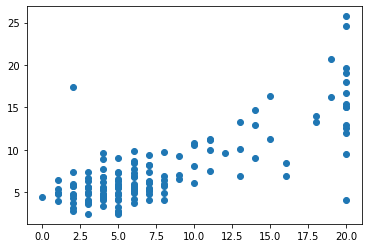

In [243]:
plt.scatter(chinese_df['count'],Y_pred)

In [256]:
pls_df=pd.DataFrame(pls_components[0])

Text(0.5, 1.0, 'Elbow curve')

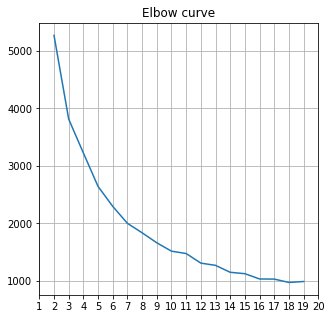

In [257]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='random',n_init=100)
    kmeans.fit(pls_df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(5, 5))
plt.plot(range(2, 20), distorsions)
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.title('Elbow curve')

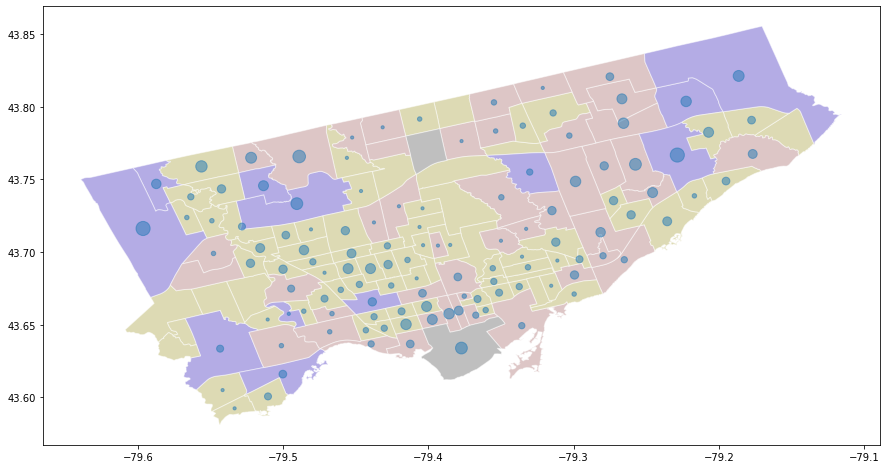

In [259]:
n_clust=4
X=pls_df
kmeans = KMeans(n_clusters=n_clust, init='random',n_init=100).fit(X)
cluster_labels=pd.DataFrame({'name':subset.index,'label':kmeans.labels_})
rand_colors = random.sample(color_list,n_clust)
cluster_labels['color']=cluster_labels['label'].map(dict(zip(range(n_clust), rand_colors)))
geo_carribean=gpd.GeoDataFrame(caribbean_df,geometry=geometry)
fig,ax=plt.subplots(figsize=(15,15))
df_toronto.plot(ax=ax,edgecolor='white',alpha=0.5,color=cluster_labels['color'],legend=True)
geo_carribean.plot(ax=ax,markersize=geo_carribean['count']*10,alpha=.5)
plt.show()

In [262]:
pd.Series(kmeans.labels_).value_counts()

1    81
2    45
0    12
3     2
dtype: int64

In [263]:
cluster_labels[cluster_labels['label']==3]

,name,label,color
122,Waterfront Communities-The Island,3,grey
129,Willowdale East,3,grey


# Select one of the previous methods

In [345]:
color_sel=['red','yellow','firebrick','orange','blue','olive','deepskyblue',
           'yellowgreen','cyan','magenta','chocolate']

### Read & process the dictionary

In [346]:
caribbean_rest=np.load('./google_api/caribbean_rest_dict.npy',allow_pickle=True).item()
names=[]
counts=[]
for key,val in caribbean_rest.items():
    names.append(key)
    counts.append(len(val['results']))
caribbean_df=pd.DataFrame({'name':names,'count':counts})
caribbean_df=caribbean_df.sort_values(by=['name'])
caribbean_df.index=neighbourhood_sel.index
caribbean_df.head(2)

,name,count
Agincourt North,Agincourt North (129),10
Agincourt South-Malvern West,Agincourt South-Malvern West (128),11


In [347]:
caribbean_df['count'].describe()

count    140.000000
mean       4.685714
std        4.247870
min        0.000000
25%        1.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: count, dtype: float64

### Select highly correlated columns

In [453]:
cols_correlated=[]
for col in neighbourhood_sel.columns:
    corr=neighbourhood_sel[col].corr(caribbean_df['count'],method='spearman')
    if abs(corr)>.4:
        print(col,corr)
        cols_correlated.append(col)
print(cols_correlated)

  No certificate, diploma or degree 0.5485858912086118
  Secondary (high) school diploma or equivalency certificate 0.4751608320902942
    Apprenticeship or trades certificate or diploma 0.4937398295944851
    Never married 0.4085667302072916
    Separated 0.42079467617026944
  $30,000 to $34,999 0.40952242762809254
  $35,000 to $39,999 0.403184237226126
  $40,000 to $44,999 0.4082736659217497
    1981 to 1990 0.4242584697017651
 Caribbean origins 0.5825080785363055
 Latin; Central and South American origins 0.4766058634348341
 African origins 0.44831916157727364
['  No certificate, diploma or degree', '  Secondary (high) school diploma or equivalency certificate', '    Apprenticeship or trades certificate or diploma', '    Never married', '    Separated', '  $30,000 to $34,999', '  $35,000 to $39,999', '  $40,000 to $44,999', '    1981 to 1990', ' Caribbean origins', ' Latin; Central and South American origins', ' African origins']


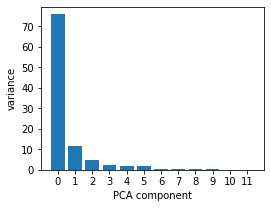

In [481]:
# Create scaler: scaler
scaler = StandardScaler()
# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

subset=neighbourhood_sel[cols_correlated]


# Fit the pipeline to 'samples'
pipeline.fit(subset)
pca_components=pipeline.transform(subset)

# Plot the explained variances
features = range(pca_components.shape[1])
explained_var=pca.explained_variance_/sum(pca.explained_variance_)*100
plt.figure(figsize=(4,3))
plt.bar(features,explained_var)
plt.xlabel('PCA component')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


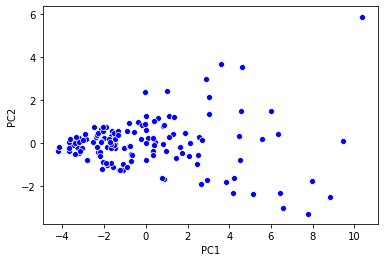

In [478]:
ax=sns.scatterplot(pca_components[:,0],pca_components[:,1],color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

## Do PCA & clustering

Text(0.5, 1.0, 'Elbow curve')

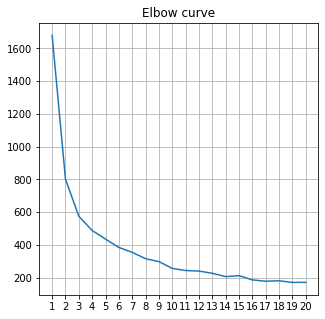

In [495]:
# Create scaler: scaler
scaler = StandardScaler()
# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)
subset=neighbourhood_sel[cols_correlated]
# Fit the pipeline to 'samples'
pipeline.fit(subset)
pca_components=pipeline.transform(subset)


distorsions = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init='random',n_init=100)
    kmeans.fit(pca_components)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(5, 5))
plt.plot(range(1, 21), distorsions)
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.title('Elbow curve')


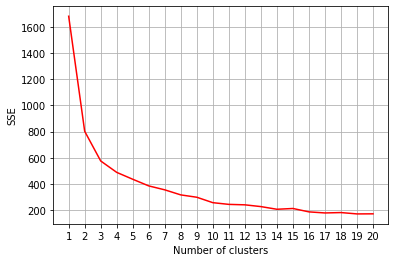

In [496]:
ax=sns.lineplot(range(1, 21), distorsions,color='red',dashes=True)
ax.grid(True)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('SSE')
ax.set_xticks(np.arange(1, 21, 1))
plt.show()

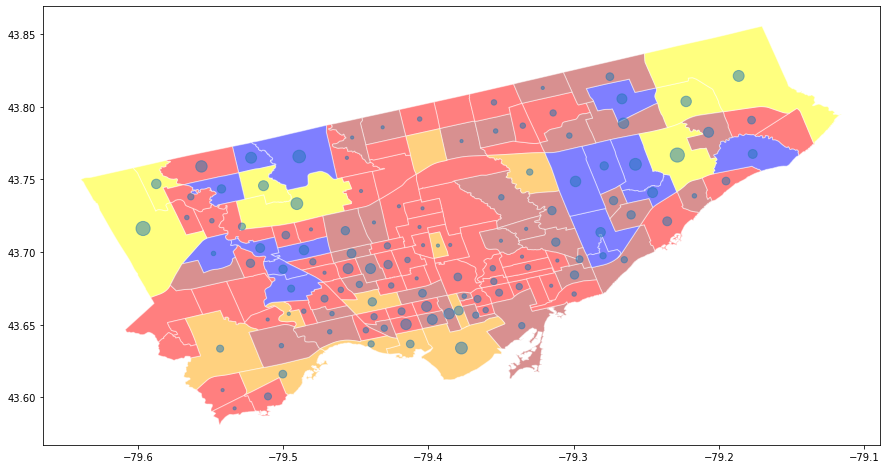

In [455]:
n_clust=5
X=pca_components
kmeans = KMeans(n_clusters=n_clust, init='random',n_init=100).fit(X)
cluster_labels=pd.DataFrame({'name':subset.index,'label':kmeans.labels_})
rand_colors = color_sel[0:n_clust]
cluster_labels['color']=cluster_labels['label'].map(dict(zip(range(n_clust), rand_colors)))
geo_carribean=gpd.GeoDataFrame(caribbean_df,geometry=geometry)
fig,ax=plt.subplots(figsize=(15,15))
df_toronto.plot(ax=ax,edgecolor='white',alpha=0.5,color=cluster_labels['color'],legend=True)
geo_carribean.plot(ax=ax,markersize=geo_carribean['count']*10,alpha=.5)
plt.show()

In [ ]:
pca_components

In [456]:
cluster_labels['color'].value_counts()

red          70
firebrick    36
blue         16
orange       11
yellow        7
Name: color, dtype: int64

In [458]:
subset_label.groupby('label').median()

Characteristic,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Married or living common law,Never married,"$150,000 to $199,999",Eastern European origins,Caribbean origins
label,,,,,,,
blue,2.850516,10.545646,37.653913,41.693260,4.199283,12.387694,3.226675
firebrick,2.980677,9.942595,45.616339,26.310462,4.927122,18.442360,3.200091
orange,7.658918,13.520750,43.490324,27.136364,2.095023,5.316172,5.989589
red,10.935992,15.290212,38.477637,29.875212,1.159714,3.617556,13.483503
yellow,1.083001,6.538171,48.195295,23.403263,12.833877,19.566443,1.890307


In [459]:
subset_label=subset.copy()
subset_label['label']=cluster_labels['color'].values
cluster_df=subset_label.groupby('label').median()
cluster_df

Characteristic,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Apprenticeship or trades certificate or diploma,Never married,Separated,"$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999",1981 to 1990,Caribbean origins,Latin; Central and South American origins,African origins
label,,,,,,,,,,,,
blue,1922.5,3335.0,740.0,6570.0,687.5,507.5,515.0,495.0,1702.5,2152.5,1517.5,1912.5
firebrick,1100.0,2297.5,460.0,5867.5,540.0,445.0,437.5,440.0,1125.0,902.5,642.5,935.0
orange,1420.0,4065.0,805.0,11785.0,940.0,795.0,865.0,890.0,2035.0,1365.0,1395.0,1545.0
red,452.5,1382.5,280.0,3430.0,285.0,222.5,237.5,227.5,660.0,470.0,435.0,447.5
yellow,3965.0,5390.0,1040.0,10045.0,1175.0,685.0,685.0,670.0,3450.0,4665.0,2115.0,3035.0


In [460]:
cluster_df.index.unique()

Index(['blue', 'firebrick', 'orange', 'red', 'yellow'], dtype='object', name='label')

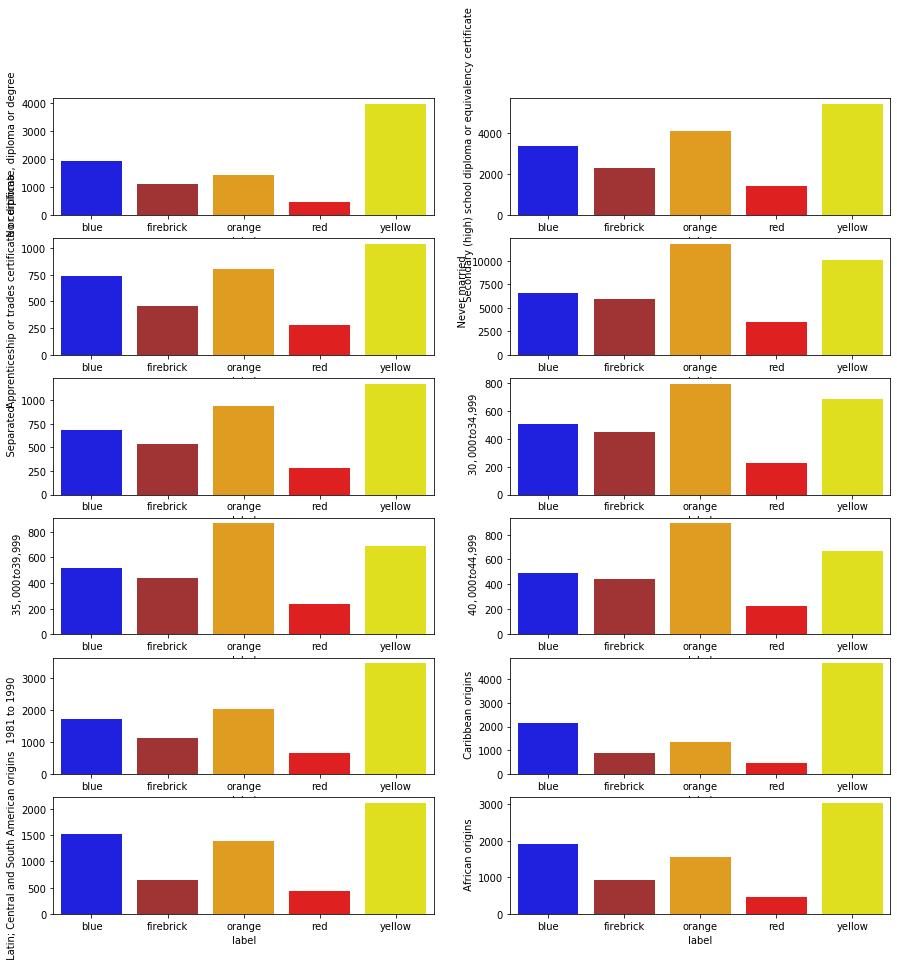

In [461]:
n_plots=len(cluster_df.columns)
rows=int((n_plots+(n_plots%2))/2)
fig,ax=plt.subplots(rows,2,figsize=(15,15))
i=0

for m in range(len(cluster_df.columns)):
    j=int(m%2)
    i=int(m/2)
    sns.barplot(y=cluster_df.iloc[:,m],x=cluster_df.index,palette=cluster_df.index,ax=ax[i,j])


plt.show()

In [462]:
subset_label.groupby('label')['label'].count()

label
blue         16
firebrick    36
orange       11
red          70
yellow        7
Name: label, dtype: int64

In [463]:
caribbean_df.head()

,name,count,geometry,label
Agincourt North,Agincourt North (129),10,POINT (-79.266712166 43.8054405769),orange
Agincourt South-Malvern West,Agincourt South-Malvern West (128),11,POINT (-79.2656117966 43.78865755109999),orange
Alderwood,Alderwood (20),1,POINT (-79.5416109273 43.6049368959),firebrick
Annex,Annex (95),6,POINT (-79.4040006243 43.6715854351),blue
Banbury-Don Mills,Banbury-Don Mills (42),3,POINT (-79.34971798079999 43.7376570043),firebrick


In [464]:
caribbean_df['label']=subset_label['label']

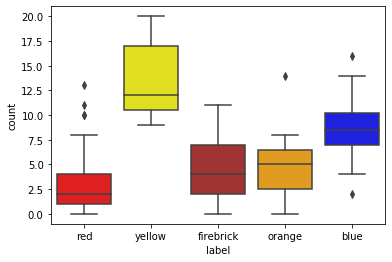

In [465]:
ax = sns.boxplot(x="label", y="count", order=rand_colors, data=caribbean_df,palette=rand_colors)

# Normalize by the population

In [423]:
population= census[census['Characteristic']=='Population, 2016'].iloc[:,6::].squeeze()
population= population.str.replace('%', '')
population= population.str.replace(',', '')
population = population.astype(float)

In [432]:
population

Agincourt North                        29113.0
Agincourt South-Malvern West           23757.0
Alderwood                              12054.0
Annex                                  30526.0
Banbury-Don Mills                      27695.0
Bathurst Manor                         15873.0
Bay Street Corridor                    25797.0
Bayview Village                        21396.0
Bayview Woods-Steeles                  13154.0
Bedford Park-Nortown                   23236.0
Beechborough-Greenbrook                 6577.0
Bendale                                29960.0
Birchcliffe-Cliffside                  22291.0
Black Creek                            21737.0
Blake-Jones                             7727.0
Briar Hill-Belgravia                   14257.0
Bridle Path-Sunnybrook-York Mills       9266.0
Broadview North                        11499.0
Brookhaven-Amesbury                    17757.0
Cabbagetown-South St. James Town       11669.0
Caledonia-Fairbank                      9955.0
Casa Loma    

In [429]:
neighbourhood_norm=neighbourhood_sel.div(population,axis=0)*100

In [434]:
neighbourhood_norm.head()

Characteristic,Population Change 2011-2016,Population density per square kilometre,Male: 10 to 14 years,Female: 10 to 14 years,Male: 15 to 19 years,Female: 15 to 19 years,Male: 20 to 24 years,Female: 20 to 24 years,Male: 25 to 29 years,Female: 25 to 29 years,Male: 30 to 34 years,Female: 30 to 34 years,Male: 35 to 39 years,Female: 35 to 39 years,Male: 40 to 44 years,Female: 40 to 44 years,Male: 45 to 49 years,Female: 45 to 49 years,Male: 50 to 54 years,Female: 50 to 54 years,Male: 55 to 59 years,Female: 55 to 59 years,Male: 60 to 64 years,Female: 60 to 64 years,Male: 65 to 69 years,Female: 65 to 69 years,Male: 70 to 74 years,Female: 70 to 74 years,Male: 75 to 79 years,Female: 75 to 79 years,Male: 80 to 84 years,Female: 80 to 84 years,Male: 85 to 89 years,Female: 85 to 89 years,Male: 90 to 94 years,Female: 90 to 94 years,Male: 95 to 99 years,Female: 95 to 99 years,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Apprenticeship or trades certificate or diploma,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,Bachelor's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry",Master's degree,Earned doctorate,Married or living common law,Never married,Separated,Divorced,Widowed,Single-detached house,Apartment in a building that has five or more storeys,Semi-detached house,Row house,Apartment or flat in a duplex,Apartment in a building that has fewer than five storeys,1 person,2 persons,3 persons,4 persons,5 or more persons,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999",Non-immigrants,Immigrants,Before 1981,1981 to 1990,1991 to 2000,2001 to 2010,2011 to 2016,Non-permanent residents,North American Aboriginal origins,Other North American origins,British Isles origins,French origins,Western European origins (except French origins),Northern European origins (except British Isles origins),Eastern European origins,Southern European origins,Jewish,Caribbean origins,Latin; Central and South American origins,African origins,West Central Asian and Middle Eastern origins,South Asian origins,East and Southeast Asian origins,Oceania origins
Agincourt North,-0.013396,13.495689,2.267028,2.043761,2.885309,2.971181,3.486415,3.349019,3.486415,3.452066,2.868135,3.211624,2.335726,2.662041,2.610518,3.125751,3.057054,3.640985,3.984474,4.431010,3.640985,4.001649,3.177275,3.675334,3.177275,3.383368,2.026586,2.370075,1.683097,1.975063,1.305259,1.665922,0.721327,1.202212,0.343489,0.549583,0.085872,0.206093,11.455364,14.563941,1.786144,8.758974,1.957888,10.613815,0.738502,0.360664,2.524645,0.291966,48.775461,25.263628,1.957888,5.014942,5.804967,11.489712,7.281970,2.765088,4.946244,2.215505,2.524645,4.637104,8.140693,6.852609,6.011060,5.650397,0.515234,0.360664,0.566757,1.545701,1.167863,1.940714,1.545701,1.751795,1.562876,1.631574,3.194449,2.593343,2.387250,2.198331,1.717446,3.211624,1.597225,1.751795,27.118469,68.680658,11.850376,11.163398,19.218219,19.012125,7.436540,3.194449,0.137396,4.619929,5.152337,0.910246,1.202212,0.274791,0.910246,4.173393,0.000000,4.963418,1.614399,1.837667,1.631574,18.067530,63.803112,0.034349
Agincourt South-Malvern West,0.033674,12.770973,1.936271,1.999411,3.283243,2.904407,4.209286,3.767311,4.398704,4.104054,3.451614,3.514754,2.630804,3.009639,2.567664,3.135918,3.199057,3.725218,4.083007,4.104054,3.577893,3.851496,2.988593,3.346382,2.651850,2.904407,1.788946,1.894179,1.473250,1.704761,1.010229,1.473250,0.652439,0.862904,0.189418,0.420929,0.084186,0.084186,7.829271,14.353664,1.936271,9.849729,2.041504,13.764364,0.904996,0.5

In [445]:
cols_correlated=[]
for col in neighbourhood_norm.columns:
    corr=neighbourhood_norm[col].corr(caribbean_df['count'],'spearman')
    if abs(corr)>.40:
        print(col,corr)
        cols_correlated.append(col)
print(cols_correlated)

  No certificate, diploma or degree 0.4492944302890503
  Secondary (high) school diploma or equivalency certificate 0.46381255980774516
  Married or living common law -0.49030193292138863
    Never married 0.4130463932344207
    $150,000 to $199,999 -0.436263083917551
 Eastern European origins -0.4987035773330557
 Caribbean origins 0.5186849751026881
['  No certificate, diploma or degree', '  Secondary (high) school diploma or equivalency certificate', '  Married or living common law', '    Never married', '    $150,000 to $199,999', ' Eastern European origins', ' Caribbean origins']


Text(0.5, 1.0, 'Elbow curve')

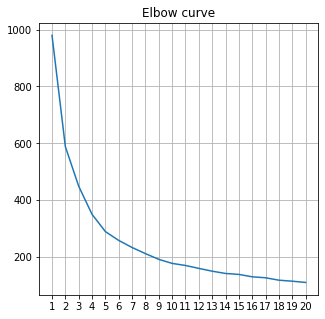

In [446]:
# Create scaler: scaler
scaler = StandardScaler()
# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)
subset=neighbourhood_norm[cols_correlated]
# Fit the pipeline to 'samples'
pipeline.fit(subset)
pca_components=pipeline.transform(subset)


distorsions = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init='random',n_init=100)
    kmeans.fit(pca_components)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(5, 5))
plt.plot(range(1, 21), distorsions)
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.title('Elbow curve')


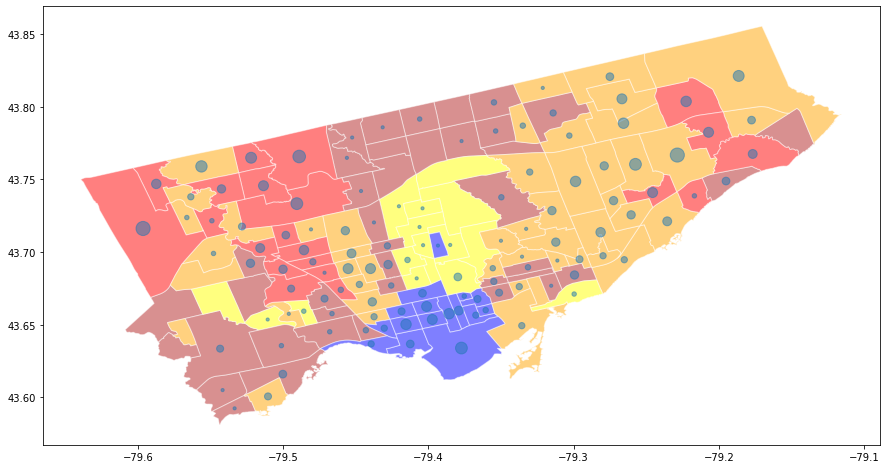

In [447]:
n_clust=5
X=pca_components
kmeans = KMeans(n_clusters=n_clust, init='random',n_init=100).fit(X)
cluster_labels=pd.DataFrame({'name':subset.index,'label':kmeans.labels_})
rand_colors = color_sel[0:n_clust]
cluster_labels['color']=cluster_labels['label'].map(dict(zip(range(n_clust), rand_colors)))
geo_carribean=gpd.GeoDataFrame(caribbean_df,geometry=geometry)
fig,ax=plt.subplots(figsize=(15,15))
df_toronto.plot(ax=ax,edgecolor='white',alpha=0.5,color=cluster_labels['color'],legend=True)
geo_carribean.plot(ax=ax,markersize=geo_carribean['count']*10,alpha=.5)
plt.show()

In [448]:
subset_label=subset.copy()
subset_label['label']=cluster_labels['color'].values
cluster_df=subset_label.groupby('label').median()
cluster_df

Characteristic,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Married or living common law,Never married,"$150,000 to $199,999",Eastern European origins,Caribbean origins
label,,,,,,,
blue,2.850516,10.545646,37.653913,41.693260,4.199283,12.387694,3.226675
firebrick,2.980677,9.942595,45.616339,26.310462,4.927122,18.442360,3.200091
orange,7.658918,13.520750,43.490324,27.136364,2.095023,5.316172,5.989589
red,10.935992,15.290212,38.477637,29.875212,1.159714,3.617556,13.483503
yellow,1.083001,6.538171,48.195295,23.403263,12.833877,19.566443,1.890307


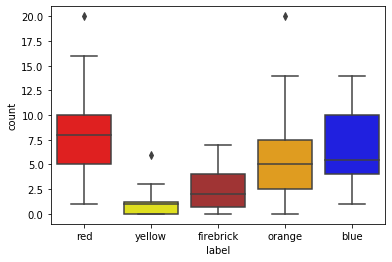

In [449]:
caribbean_df['label']=subset_label['label']
ax = sns.boxplot(x="label", y="count", order=rand_colors, data=caribbean_df,palette=rand_colors)

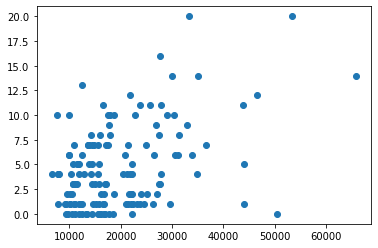

In [467]:
plt.scatter(population,caribbean_df['count'])
plt.show()